In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, FeatureAgglomeration, mean_shift, dbscan

In [47]:
df_bear = pd.read_csv('bearing_final_data.csv', index_col=0)

In [48]:
df_bear

,a1_x_mean,a1_y_mean,a1_z_mean,a2_x_mean,a2_y_mean,a2_z_mean,rpm_mean,hz_mean,w_mean,a1_x_fft_mean,...,a1_z_amp_mean,a2_x_amp_mean,a2_y_amp_mean,a2_z_amp_mean,a1_x_amp_max,a1_y_amp_max,a1_z_amp_max,a2_x_amp_max,a2_y_amp_max,a2_z_amp_max
bearing_id,,,,,,,,,,,,,,,,,,,,,
2,-0.174032,-0.007636,-0.053353,-0.178986,0.024936,0.194061,1074.981634,17.916361,0.501160,3.459109,...,3.581353,2.521898,3.581353,3.662380,22.177219,17.707234,15.252773,21.194466,15.252773,17.707234
3,-0.172328,-0.002343,-0.039898,-0.121842,0.036149,0.183881,1149.927038,19.165451,0.513051,3.763797,...,3.917454,2.556373,3.917454,3.986035,22.810187,18.881881,16.024957,22.860777,16.024957,18.881881
4,-0.149644,-0.000549,-0.037679,-0.119574,0.030838,0.200699,1127.538630,18.792311,0.539426,3.636525,...,3.689783,2.293293,3.689783,3.834951,20.557838,15.777804,16.857276,19.053852,16.857276,15.777804
5,-0.146438,0.015268,-0.026678,-0.080799,0.034042,0.206547,1037.216452,17.286941,0.353715,3.409107,...,3.450111,2.671111,3.450111,3.702928,25.201937,18.334126,16.483506,22.290534,16.483506,18.334126
6,-0.143340,0.010808,-0.035890,0.380514,0.049622,0.266823,1121.730015,18.695500,0.473679,4.219683,...,4.892761,3.821588,4.892761,4.497673,33.557075,23.363376,25.477474,31.716083,25.477474,23.363376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-0.230311,-0.004166,0.053886,-0.736975,0.007928,0.108286,977.960660,16.299344,0.439244,3.226409,...,3.604335,3.721795,3.604335,3.569131,21.267718,19.564344,21.532359,25.327678,21.532359,19.564344
97,-0.213683,-0.008270,0.039880,-0.713652,0.009315,0.095118,885.335761,14.755596,0.297943,2.566103,...,3.066380,3.268857,3.066380,3.137386,20.785152,20.271543,21.993971,21.459002,21.993971,20.271543
98,-0.245854,-0.009958,0.068156,-0.669722,0.012108,0.206580,1007.240234,16.787337,0.292290,3.137251,...,3.508802,3.768710,3.508802,3.550248,20.970713,19.775539,21.069309,24.970557,21.069309,19.775539


## KMeans Clustering

In [49]:
df_vib_amp = df_bear['a2_x_mean'].to_frame().join(df_bear['a2_x_amp_max'].to_frame())
df_vib_amp = df_vib_amp.reset_index()

Silhouette score: 0
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 1 1 1 4 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4
 4 4 3 3 3 3 3 3 3 3 3 3 3 3 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0 7 0 7 7 7 7 7 7
 7 7 7 7 7 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


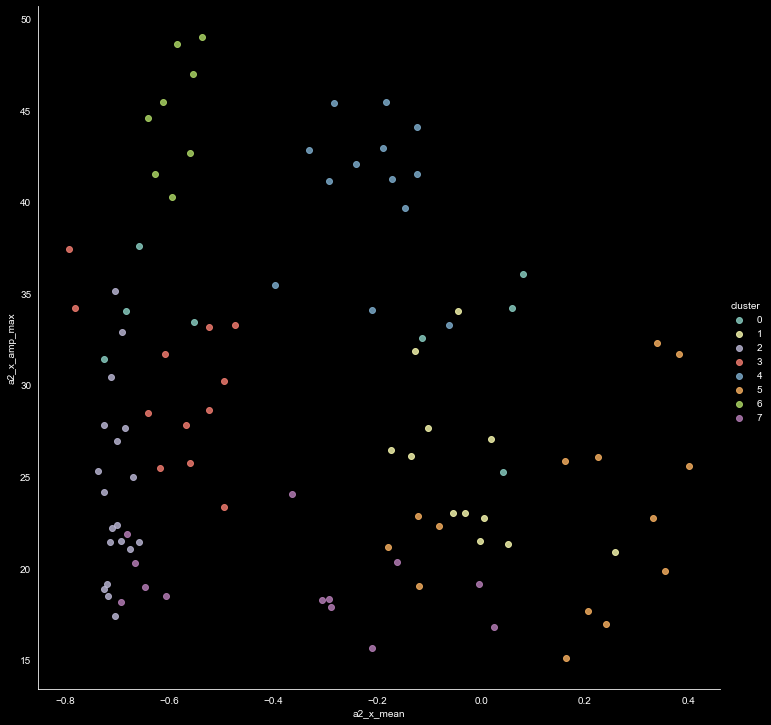

In [50]:
# fit a kmeans object to the dataset
kmeans = KMeans(init='k-means++').fit(df_vib_amp)

# labels and clusters are attributes of the object
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# add cluster index to dataframe
cluster_labels = pd.Series(labels, name='cluster')
df_vib_amp = df_vib_amp.join(cluster_labels.to_frame())

# Score
print("Silhouette score: %d" %silhouette_score(df_vib_amp, labels))
print(labels)

# visualize clusters
plt.style.use('dark_background')
sns.lmplot(x='a2_x_mean', y='a2_x_amp_max',  height=10, data=df_vib_amp,
           fit_reg=False, hue='cluster')
plt.grid(False)
plt.show()